# Titanic - Machine Learning from Disaster

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [123]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [126]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)


print("Procent kobiet które przeżyły:", rate_women*100)

print("Procent mężczyzn którzy przeżyli:", rate_men*100)

Procent kobiet które przeżyły: 74.20382165605095
Procent mężczyzn którzy przeżyli: 18.890814558058924


In [127]:
test_data["Age"].fillna(train_data.Age.mean(), inplace=True)
dane_test = test_data[["Age","Sex", "Pclass", "Parch", "SibSp"]]
dane_test["Sex"]=dane_test["Sex"].replace("male", 0)
dane_test["Sex"] =dane_test["Sex"].replace("female", 1)

train_data["Age"].fillna(train_data.Age.mean(), inplace=True)
dane = train_data[["Age","Sex", "Pclass", "Parch", "SibSp"]]
dane["Sex"]=dane["Sex"].replace("male", 0)
dane["Sex"] =dane["Sex"].replace("female", 1)
dane.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Age,Sex,Pclass,Parch,SibSp
0,22.0,0,3,0,1
1,38.0,1,1,0,1
2,26.0,1,3,0,0
3,35.0,1,1,0,1
4,35.0,0,3,0,0


# Porównałem 3 modele 
## Najmniejszy błąd otrzymałem dla modelu Decision Tree Classifier

In [128]:
KNC= KNeighborsClassifier(n_neighbors=5)
DTC= DecisionTreeClassifier(random_state=1)
RFC= RandomForestClassifier(random_state=1)

In [129]:

y = train_data[["Survived"]]
train_X, val_x, train_y, val_y = train_test_split(dane, y, random_state=1)


RFC.fit(train_X, train_y)
RFC_mae = mean_absolute_error(val_y, RFC.predict(val_x))

KNC.fit(train_X, train_y)
KNC_mae =  mean_absolute_error(val_y, KNC.predict(val_x))

DTC.fit(train_X, train_y)
DTC_mae =  mean_absolute_error(val_y, DTC.predict(val_x))


print("RFC: ", RFC_mae, "\nKNC: ", KNC_mae, "\nDTC: ", DTC_mae)
#Błąd najmniejszy dla DTC więc używam tego modelu

wynik_DTC = DTC.predict(dane_test)

output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': wynik_DTC})
output.to_csv('my_titanic.csv', index=False)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RFC:  0.22869955156950672 
KNC:  0.273542600896861 
DTC:  0.22869955156950672


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


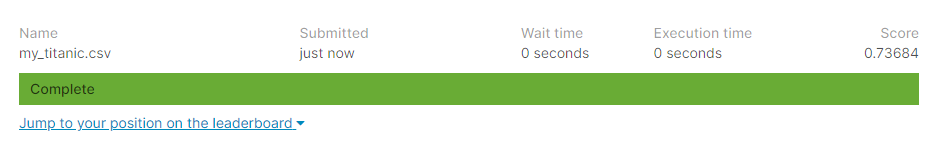
# Otrzymany wynik: 0.73684